# Анализ продаж компьютрных игр  

**Цели и задачи исследования**  

Основная цель *выявить определяющие успешность игры закономерности на 2017г*. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.  

В ходе анализа так же необходимо проверить две гипотезы:

* Средние пользовательские рейтинги платформ Xbox One  и PC одинаковые;

* Средние пользовательские рейтинги жанров Action (англ. "действие", экшен-игры) и Sports(англ. "спортивные соревнования") разные.  

Для этого мы пройдм по следующим этапам:

*    Обзор данных;
*    Предобработка данных, обработка аноалий в данных;  
*    Проведене дополнительных рассчетов;
*    Исследование данных;
*    Проверка гипотез. 

## Шаг 1. Загрузка данных

In [1]:
# импорт библиотек

from scipy import stats as st
from math import factorial
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
class color: #классы для комфортного вывода текста
    PURPLE = '\033[95m'
    CYAN = '\033[96m'
    DARKCYAN = '\033[36m'
    BLUE = '\033[94m'
    GREEN = '\033[92m'
    YELLOW = '\033[93m'
    RED = '\033[91m'
    BOLD = '\033[1m'
    UNDERLINE = '\033[4m'
    END = '\033[0m'

In [3]:
# выгрузим датасет и сохраним в переменную
games = pd.read_csv('/datasets/games.csv')

In [4]:
#ознакомимся с данными
print(color.BOLD + 'Пример данных' + color.END) # жирный шрифт, чтобы можно было комфортно разлечить блоки
display(games.sample(10))
print(color.BOLD + '\nОбщая информация о данных\n' + color.END)
display(games.info())
print(color.BOLD + '\nДоля пропусков' + color.END)
display(pd.DataFrame(round(games.isna().mean()*100,2)).style.background_gradient('coolwarm'))
print(color.BOLD + '\nКоличество полных дубликатов' + color.END)
games.duplicated().sum()

Пример данных


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
14549,Klonoa 2: Dream Champ Tournament,GBA,2002.0,Platform,0.02,0.01,0.00,0.00,78.0,9.3,E
9697,Mugen no Frontier: Super Robot Taisen OG Saga ...,DS,2010.0,Role-Playing,0.00,0.00,0.12,0.00,NaN,NaN,NaN
4983,Sega Superstars Tennis,PS2,2008.0,Sports,0.10,0.00,0.00,0.28,70.0,8.3,E10+
10943,Shin Megami Tensei,PS,2001.0,Role-Playing,0.00,0.00,0.09,0.01,NaN,NaN,NaN
3265,Battle of Giants: Dragons,DS,2009.0,Strategy,0.30,0.25,0.00,0.06,NaN,6,E10+
8739,Pressure Cooker,2600,1982.0,Action,0.14,0.01,0.00,0.00,NaN,NaN,NaN
13811,Winning Post 7 2012,PSP,2012.0,Sports,0.00,0.00,0.04,0.00,NaN,NaN,NaN
13498,Looney Tunes: Cartoon Conductor,DS,2008.0,Misc,0.04,0.00,0.00,0.00,67.0,tbd,E
10080,Mass Destruction,PS,1997.0,Shooter,0.06,0.04,0.00,0.01,NaN,NaN,NaN
231,Uncharted: The Nathan Drake Collection,PS4,2015.0,Action,2.07,1.71,0.08,0.76,86.0,8.1,T



Общая информация о данных

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


None


Доля пропусков


,0
Name,0.010000
Platform,0.000000
Year_of_Release,1.610000
Genre,0.010000
NA_sales,0.000000
EU_sales,0.000000
JP_sales,0.000000
Other_sales,0.000000
Critic_Score,51.320000
User_Score,40.090000



Количество полных дубликатов


0

Мы ознакомились с данными, датасет содержат 11 столбцов:  
    
* `Name` - название игры
* `Platform` - платформа
* `Year_of_Release` - год выпуска (данные за 2016г не полные)
* `Genre` - жанр игры
* `NA_sales` - продажи в Северной Америке (млн. проданных копий)
* `EU_sales` - продажи в Европе (млн. проданных копий)
* `JP_sales` - продажи в Японии (млн. проданных копий)
* `Other_sales` - продажи в других странах (млн. проданных копий)
* `Critic_Score` - оценка критиков (максимум 100 баллов)
* `User_score` - оценка пользователей (максимум 10 баллов)
* `Rating` - возрастной рейтинг организации ESRB (англ. Entertainment Spftware Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.  

В столбцах `Name`, `Genre` доля пропусков совершенно незначительная, их можно будет удалить сразу.  

`Year_of_Release` содержит 1.6% пропусков, что тоже не критично для удаления и позволит сменить тип данных на целочисленный.  
А вот `Critic_Score`, `User_score` и `Rating` имеют всомые доли пропусков (более 40%), с этим нужно будет разбираться подробнее.  
Полных явных дубликатов нет. 

**Вывод:**  

Данные давольно объемные, что хорошо для исследования.  
Но есть недостатки:
1. Эстетически некотрректные названия столбцов (заглавные буквы)  
2. Странные типы данных, например, год релиза типа float64 или оценка пользователей типа object   
3. В некоторых столбцах есть пропуски.  

## Шаг 2. Предобработка данных

Нам этапе предобработки нам предстоит:  
1. Привести названия столбцов к эстетически правильным  
2. Изучить каждый столбец на предмет:  
* Пропусков  
* Дубликатов  
* Корректного типа данных
* Аномальных/некорректных значений.  

По возможности, исправим все найденные недостатки. 

### Названия столбцов

Переведем все названия столбцов к эстетически верному - переведем в нижний регистр. 

In [5]:
games.columns = games.columns.str.lower()#перевод всех названий в нижний регистр
games.columns #проверяем

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

### `Name`

Мы уже выяснили, что доля пропусков 1сотая процента и их количество всего 2строчки, можем удалить, т. к. мы планируем анализировать продажи игр и игры без имени нам совершенно не помогут. 

In [6]:
games = games[games['name'].notnull()].reset_index(drop=True)
games['name'].isna().sum() #проверяем

0

В отдельном столбце с именем искать дубли смысла нет, т. к. одни и те же игры выходили на разных платформах, в разные годы.  
Имеет смысл проверить дубликаты в связке Название, Платформа, Год релиза. 

In [7]:
display(games.loc[games.duplicated(subset=['name', 'platform', 'year_of_release'], keep=False)])

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
604,Madden NFL 13,PS3,2012.0,Sports,2.11,0.22,0.0,0.23,83.0,5.5,E
16228,Madden NFL 13,PS3,2012.0,Sports,0.00,0.01,0.0,0.00,83.0,5.5,E


Игра Madden NFL 13 на PS3, 2012г релиза повторяется дважды, при этом оценки и рейтинг у дублей одинаковые, а продажи у повтора отсутствуют.  Удалим дубли, оставив первое значение.  

In [8]:
games = games.drop_duplicates(subset=['name', 'platform', 'year_of_release'], keep='first') 
display(games.loc[games.duplicated(subset=['name', 'platform', 'year_of_release'], keep=False)]) #проверяем

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


### `year_of_release`

`year_of_release`содержат меньше 2% пропусков каждый, их можно спокойно удалить. 

In [9]:
games = games.dropna(subset=['year_of_release']).reset_index(drop=True)
games['year_of_release'].isna().sum() #проверяем

0

Тип данных сразу переведем в целочисленный и посмотрим за какие годы у нас данные. 

In [10]:
games['year_of_release'] = games['year_of_release'].astype(int)
sorted(games['year_of_release'].unique())

[1980,
 1981,
 1982,
 1983,
 1984,
 1985,
 1986,
 1987,
 1988,
 1989,
 1990,
 1991,
 1992,
 1993,
 1994,
 1995,
 1996,
 1997,
 1998,
 1999,
 2000,
 2001,
 2002,
 2003,
 2004,
 2005,
 2006,
 2007,
 2008,
 2009,
 2010,
 2011,
 2012,
 2013,
 2014,
 2015,
 2016]

### `genre`

Здесь пропусков так же 1сотая процента, потому удаляем. 

In [11]:
games = games[games['genre'].notnull()].reset_index(drop=True)
games['genre'].isna().sum() #проверяем

0

### `critic_score`, `user_score`

In [12]:
print(color.BOLD + '\nУникальные значения оценок критиков' + color.END)
display(games['critic_score'].unique())
print(color.BOLD + '\nДоля пропусков' + color.END)
games['critic_score'].isna().mean().round(2)*100


Уникальные значения оценок критиков


array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 41., 36., 31., 27., 35., 26., 19., 28., 23.,
       24., 21., 17., 13.])


Доля пропусков


51.0

In [13]:
print(color.BOLD + '\nУникальные значения оценок пользоватетелй' + color.END)
display(games['user_score'].unique())
print(color.BOLD + '\nДоля пропусков' + color.END)
games['user_score'].isna().mean().round(2)*100


Уникальные значения оценок пользоватетелй


array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)


Доля пропусков


40.0

В обоих столбцах очень высокая доля пропусков, удалять их точно нельзя.  
Заменять их каким-либо другим числом тоже некорректно, т. к. это повлияет на потенциальные рассчеты или агрегацию.  

В оценках пользователей еще встречается tbd (англ. To Be Determined, то есть "Будет определено"), для того, чтобы заменить тип данных на число с плавающей запятой, нужно это значение заменить на пропуск. 

In [14]:
games['user_score'].replace('tbd', np.nan, inplace=True)
games['user_score'] = games['user_score'].astype('float') # сразу меняем тип данных
print(color.BOLD + '\nУникальные значения оценок пользоватетелй' + color.END) #проверяем
display(games['user_score'].unique())
print(color.BOLD + '\nДоля пропусков' + color.END)
games['user_score'].isna().mean().round(2)*100


Уникальные значения оценок пользоватетелй


array([8. , nan, 8.3, 8.5, 6.6, 8.4, 8.6, 7.7, 6.3, 7.4, 8.2, 9. , 7.9,
       8.1, 8.7, 7.1, 3.4, 5.3, 4.8, 3.2, 8.9, 6.4, 7.8, 7.5, 2.6, 7.2,
       9.2, 7. , 7.3, 4.3, 7.6, 5.7, 5. , 9.1, 6.5, 8.8, 6.9, 9.4, 6.8,
       6.1, 6.7, 5.4, 4. , 4.9, 4.5, 9.3, 6.2, 4.2, 6. , 3.7, 4.1, 5.8,
       5.6, 5.5, 4.4, 4.6, 5.9, 3.9, 3.1, 2.9, 5.2, 3.3, 4.7, 5.1, 3.5,
       2.5, 1.9, 3. , 2.7, 2.2, 2. , 9.5, 2.1, 3.6, 2.8, 1.8, 3.8, 0. ,
       1.6, 9.6, 2.4, 1.7, 1.1, 0.3, 1.5, 0.7, 1.2, 2.3, 0.5, 1.3, 0.2,
       0.6, 1.4, 0.9, 1. , 9.7])


Доля пропусков


55.00000000000001

Теперь у нас получается примерно одинаковая доля пропусков в оценках критиков и пользователей(51% и 55% соответственно).  
На этапе исследования нам понадобится смотреть корреляцию продаж с оценками и, возможно, производить какие-то математические действия с этими столбцами.  
Потому, залить 50% данных какими-то предполагаемыми значениями (например, медианой) не кажется хорошей идеей. 

### `rating`

In [15]:
print(color.BOLD + '\nУникальные значения' + color.END)
display(games['rating'].value_counts())
print(color.BOLD + '\nДоля пропусков' + color.END)
games['rating'].isna().mean().round(2)*100


Уникальные значения


E       3920
T       2905
M       1536
E10+    1393
EC         8
K-A        3
RP         1
AO         1
Name: rating, dtype: int64


Доля пропусков


41.0

Entertainment Software Rating Board (ESRB) — негосударственная организация, основное направление деятельности — принятие и определение рейтингов для компьютерных видеоигр и другого развлекательного программного обеспечения в США и Канаде. ESRB была основана в 1994 году ассоциацией Interactive Digital Software Association (современное название — «Entertainment Software Association»).  

 `«EC»` («Early childhood») — «Для детей младшего возраста»: Игра подходит для детей от 3 лет и не содержит материалов, которые родители могли бы счесть неподходящими. Продукты, получившие данный рейтинг, изначально разрабатываются для детей и обычно представляют собой развивающие игры.


`«E»` («Everyone») — «Для всех»: Содержание вполне подходит для всех возрастов (ранее с 6 лет). Такие игры могут понравиться и взрослым. Игры с этим рейтингом могут содержать минимальное насилие, в основном «мультяшного» характера. Первоначально `"K-A"` ("Kids to Adults") до 1998г. 


`«E10+»` («Everyone 10 and older») — «Для всех от 10 лет и старше»: Проекты с данным рейтингом могут содержать больше мультипликационного или мягкого насилия, или несколько откровенные сцены, или минимальное количество крови. Рейтинг был принят ESRB 2 марта 2005 года.


`«T»` («Teen») — «Подросткам»: Игра подходит для лиц от 13 лет. Проекты из данной категории могут содержать насилие, непристойные сцены, грубый юмор, в меру откровенное сексуальное содержимое, кровь или нечастое использование ненормативной лексики.


`«M»` («Mature») — «Для взрослых»: Материалы игры не подходят для лиц младше 17 лет. Проекты с данным рейтингом могут содержать жестокое насилие, большое количество крови с расчленением, непристойные сексуальные сцены или грубую ненормативную лексику.


`«AO»` («Adults Only 18+») — «Только для взрослых»: Содержание игры только для взрослых старше 18 лет. Продукты из данной категории могут содержать длительные сцены жестокого насилия и/или очень откровенное сексуальное содержимое.  


`«RP»` («Rating Pending») — «Рейтинг ожидается»: Продукт был отправлен в ESRB и ожидает присвоения рейтинга. Данный логотип используется только на рекламных презентациях и в демо-версиях игр до официальной даты выпуска в продажy.   

1. Пропуски в рейтинге обоснованы 3-мя вещами:  
   * Данные у нас с 1980г, а рейтинг ввели в 1994  
   * Данный рейтинг создан и применяется в Северной Америке и Канаде, потому на Японских, например, играх обозначения данного рейтинга не будет
   * Каки-то игры могли еще не успеть оценить и присвоить рейтинг.   

В виду вышеописанного заменять пропуски каким-либо значением некорректно.  
Заменим на "unknown".  
Ниже еще посмотрим на график количества игр с рейтингом по годам.  

2. `"K-A"` нужно заменить на `«E»`, т. к. то одно. то же обозначение, которое изменилось в 1998г.  
3. `«RP»` оначает, по факту, отсутствие рейтинга, потому это значение можно заменить на "unknown" вместе с обработкой пропусков.  
4. Крайне мало игр имеют рейтинг `«EC»` и `«AO»`, однако заменять их на что-либо некорректно. 

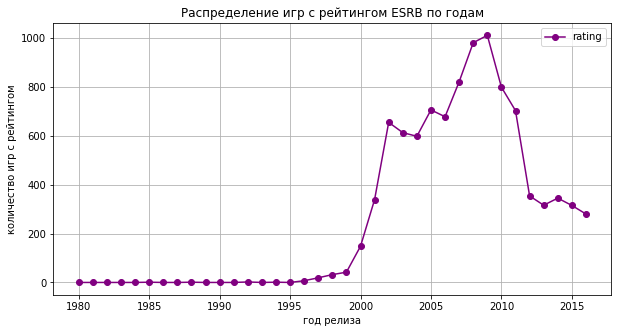

In [16]:
games.pivot_table(index = 'year_of_release', values = 'rating', aggfunc = 'count').plot(figsize=(10,5), grid=True, style='o-', color='purple')
plt.xlabel('год релиза')
plt.ylabel('количество игр с рейтингом')
plt.title('Распределение игр с рейтингом ESRB по годам')
plt.show()

Действительно можем увидеть, что количество игр с рейтингом растет с 1995г.

In [17]:
games.loc[games['rating'] == 'K-A', 'rating'] = 'E' # меняем рейтинг K-A на E
games['rating'].replace('RP', np.nan, inplace=True) # заменяем RP на nan
games['rating'] = games['rating'].fillna('unknown') # заполняем пропуски 
games['rating'].unique() # проверяем


array(['E', 'unknown', 'M', 'T', 'E10+', 'AO', 'EC'], dtype=object)

### Суммарная выручка по всем регионам

Для каждый игры посчитаем и выведем в отдельный столбец с суммарными продажами. 

In [18]:
games['total_sales'] = games['na_sales'] + games['eu_sales'] + games['jp_sales'] + games['other_sales']
games.sample(10) # проверяем

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
10684,Robots,XB,2005,Action,0.07,0.02,0.00,0.00,60.0,NaN,E,0.09
924,SingStar,PS2,2004,Misc,0.00,1.37,0.00,0.49,NaN,NaN,unknown,1.86
5448,Harry Potter and the Half-Blood Prince,PS3,2009,Action,0.15,0.12,0.00,0.05,66.0,7.1,E10+,0.32
16173,Dinotopia: The Sunstone Odyssey,XB,2003,Action,0.01,0.00,0.00,0.00,44.0,NaN,T,0.01
10890,Saikyou Habu Shogi,N64,1996,Misc,0.00,0.00,0.06,0.03,NaN,NaN,unknown,0.09
11952,My Dress-Up,DS,2008,Misc,0.06,0.01,0.00,0.01,NaN,NaN,E10+,0.08
3123,Cruis'n World,N64,1998,Racing,0.59,0.04,0.00,0.01,NaN,NaN,unknown,0.64
14639,Clannad: Mitsumi Mamoru Sakamichi de - Gekan,PSP,2010,Adventure,0.00,0.00,0.03,0.00,NaN,NaN,unknown,0.03
6305,Operation Armored Liberty,GBA,2003,Action,0.19,0.07,0.00,0.00,NaN,NaN,T,0.26
7388,God of War Collection,PSV,2014,Action,0.08,0.06,0.01,0.05,73.0,7.4,M,0.20


**Вывод**  

Обработали столбцы с аномалиями:  

    1. Заменили названия колонок на стилистически правильные  
    2. Удалили пропуски в столбцах с Именем, Жанром и Годом релиза, т. к. доля пропусков была меньше 2%  
    3. Обработали дубликаты по связке Имя, Платформа, Год релиза  
    4. В столбце Год релиза заменили тип данных на целочисленный, а в Оценка пользователей на Число с плавающей запятой  
    5. Так же в Оценках пользователей убрали "Будет оценен" на пропуск  
    6. В столбце с Рейтингом убрали неактуальные значения и заполнили пропуски 'unknown'  
    7. Добавили столбец с суммарными продажами по всем регионам для каждой игры. 

## Шаг 3. Исследовательский анализ данных

### Поиск перспективно прибыльных платформ

#### Найдем актуальный период для анализа

Для начала посмотрим в каком количестве выпускались игры по годам и в каком количестве продавались. 

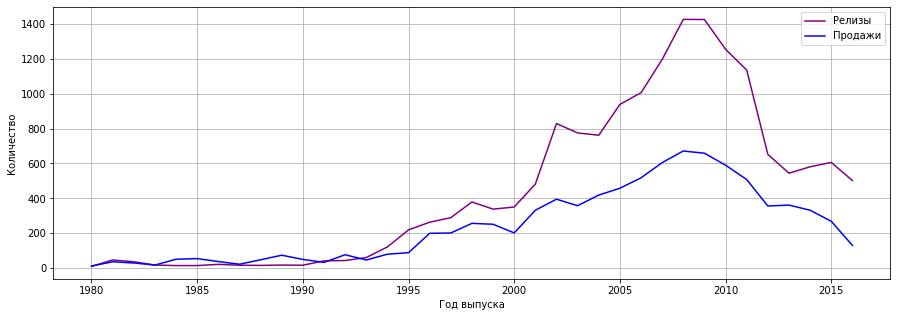

In [19]:
plt.figure(figsize=(15,5))
plt.plot(games.groupby('year_of_release')['name'].count(), label='Релизы', color='purple')
plt.plot(games.groupby('year_of_release')['total_sales'].sum(), label='Продажи', color='blue')
plt.legend()
plt.grid()
plt.xlabel('Год выпуска')
plt.ylabel('Количество')
plt.show()

1. Мы видим, что графики количества релизов и кол-ва млн проданных штук схожи.  
2. Мы видим рост и релизов и продаж с 94года, возможно это связано с такими событиями:  
 * В 94 году появился интернет  
 * Вышла игра Doom, первый шутер от первого лица  
 * Появилась Sony Playstation, что можно считать фундаментальным событием в мире видеоигр  

3. Пик количества релизов и продаж прихлжится на 2008-2009г  
4. В 2016 можно наблюдать серьезное падение, однако, это может быть связано с тем, что ланные а 2016г не полные. 

Первым этаом актуализации данных можно считать отбрасывание "хвоста" до 94г  

In [20]:
games = games.query('year_of_release >= 1994')
games['year_of_release'].value_counts()

2008    1427
2009    1426
2010    1255
2007    1197
2011    1136
2006    1006
2005     939
2002     829
2003     775
2004     762
2012     652
2015     606
2014     581
2013     544
2016     502
2001     482
1998     379
2000     350
1999     338
1997     289
1996     263
1995     219
1994     121
Name: year_of_release, dtype: int64

И мы действительно можем видеть, что пик продаж в 2008-2009гг. 

Выберем платформы ТОПы по продажам.  
Для этого посмотрим суммарные продажи по всем платформам и Сводную по этим количественным данным. 

In [21]:
print(color.BOLD + '\nСводная статистика о суммарных продажах по платформам' + color.END)
display(games.pivot_table(index='platform',
                  values='total_sales',
                  aggfunc = 'sum').reset_index().describe())

print(color.BOLD + '\nСуммарные продажи по платформам' + color.END)
games.pivot_table(index='platform',
                  values='total_sales',
                  aggfunc = 'sum').reset_index().sort_values('total_sales', ascending=False)


Сводная статистика о суммарных продажах по платформам


,total_sales
count,29.000000
mean,283.935517
std,357.075159
min,0.030000
25%,8.130000
50%,159.320000
75%,312.880000
max,1233.560000



Суммарные продажи по платформам


,platform,total_sales
14,PS2,1233.56
26,X360,961.24
15,PS3,931.33
24,Wii,891.18
3,DS,802.76
13,PS,727.58
16,PS4,314.14
5,GBA,312.88
17,PSP,289.53
1,3DS,257.81


Возьмем за ТОПы верхние 25%, т. е. те платформы, продажи которых начинаются от 312,8млн копий.  
По ним мы будем строить распределение по годам (это ТОП8 платформ).  
Сначала создадим список из этих 8 платформ. 

In [22]:
top = list(games.pivot_table(index='platform',
                  values='total_sales',
                  aggfunc = 'sum').reset_index().sort_values('total_sales', ascending=False).head(8)['platform'])
top

['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS', 'PS4', 'GBA']

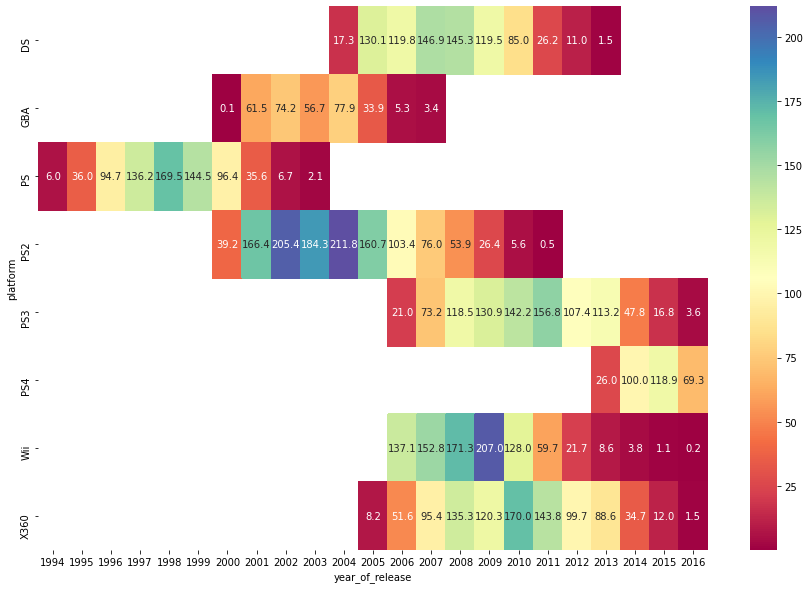

In [23]:
plt.figure(figsize=(15, 10))
sns.heatmap(games
.loc[games['platform'].isin(top)]
.pivot_table(index='platform',
                  values='total_sales',
                  columns = 'year_of_release',
                  aggfunc = 'sum'), annot=True, fmt=".1f", cmap='Spectral', cbar=True)
plt.show()

На хитмэпе видно, что цикл жизни платформ составляет примерно от 9 до 12 лет.  
Это значит, что для прогнозирования подаж на следующий год можно использовать данные за последние 5-ть лет: платформы, которые появились в этот срок, и продажи по ним растут, будут либо на пике продаж, либо иметь еще пару лет до него и будут приносить деньги еще и в достаточно долгий перид "падения".  
Платформы, которые уже достигли 0, можно считать мертвыми и не надеяться на воскрешение. 

Давайте посмотрим данные за 2011-2016 гг., чтобы понять, какие платформы окажутся в лидерах.  
(с 2011, т. к. данные за 2016 неполные)

In [24]:
games = games.query('year_of_release >= 2011') #выделяем данные за актуальный период
games['year_of_release'].unique()

array([2013, 2011, 2015, 2012, 2014, 2016])

И далее в исследовании мы не используем неактуальные данные до 2011г. 

#### Найдем перспективные платформы

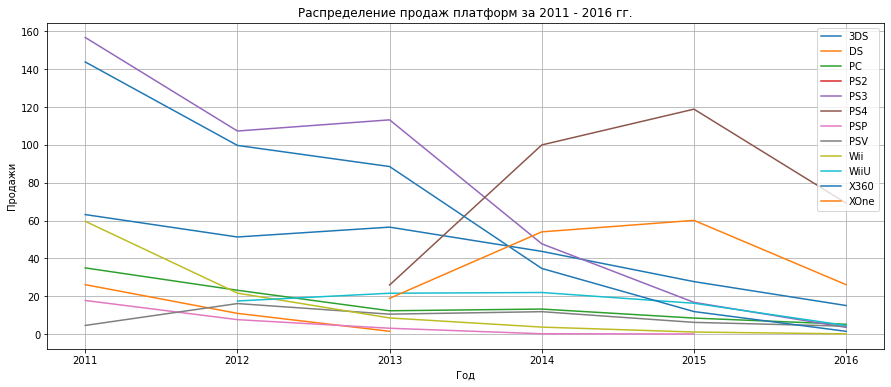

In [25]:
games.pivot_table( # строим график продаж по плаформам за актуальный период, чтбы выделить перспективные
    index = 'year_of_release',
    columns = 'platform',
    values = 'total_sales',
    aggfunc = 'sum'
    ).reset_index().plot(x='year_of_release',figsize=(15,6))
plt.legend()
plt.grid()
plt.xlabel('Год')
plt.ylabel('Продажи')
plt.title('Распределение продаж платформ за 2011 - 2016 гг.')
plt.show()

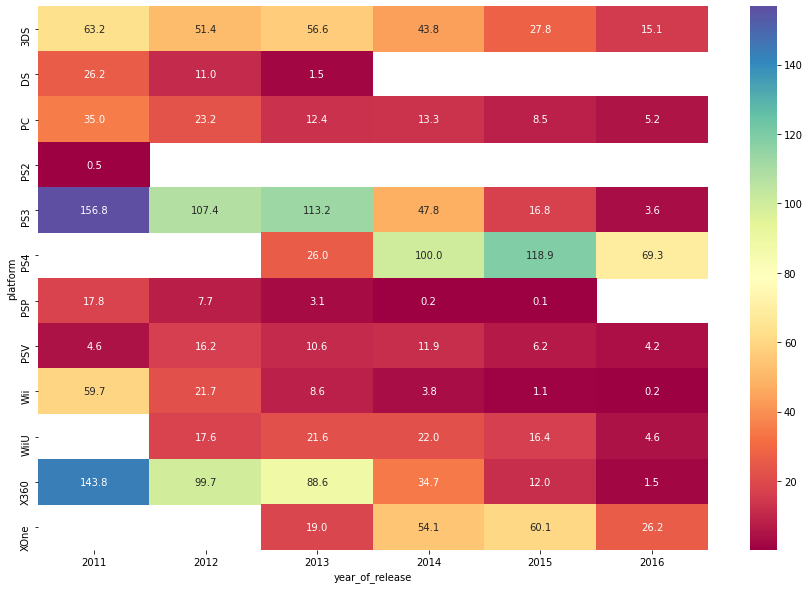

In [26]:
plt.figure(figsize=(15, 10)) 
sns.heatmap(games
.pivot_table(index = 'platform',
    columns = 'year_of_release',
    values = 'total_sales',
    aggfunc = 'sum'
    ), annot=True, fmt=".1f", cmap='Spectral', cbar=True)
plt.show()

На графике и хитмэпе видно, что потенциально прибыльными на платформами можно считать PS4, XOne, а еще какое-то время будут актуальны 3DS, PSV, PS3, PC и WiiU. 
Остальные либо уже умерли окончательно (DS, PS2, PSP), либо умрут очень скоро (Wii, X360).  
Да, в 2016г падение у всех, но мы помним, что данные не полные.  

Как наиболее потенциально прибыльные на 2017г (исходя из продаж и "продолжительности жизни") возьмем:  
PS4, XOne, 3DS и WiiU.

In [27]:
# создадим список для дальнейшего использования
top_pl = ['PS4', 'WiiU', 'XOne', '3DS']
top_pl

['PS4', 'WiiU', 'XOne', '3DS']

### Подробное исследование перспективных платформ

Построим диаграммы размаха продаж выбранных перспективных платформ за выбранный актуальный период. 

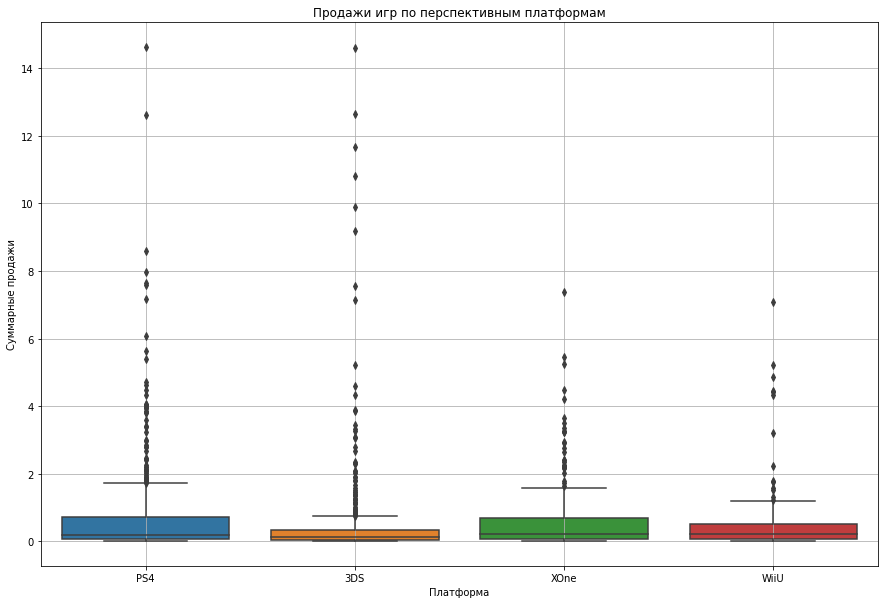

In [28]:
fig = plt.subplots(figsize=(15,10))
plt.title('Продажи игр по перспективным платформам')
plot = sns.boxplot(x='platform', y='total_sales', data=games.query('platform.isin(@top_pl)'))
plt.xlabel('Платформа')
plt.ylabel('Суммарные продажи')
plt.grid()
plt.show()

Мы видим, что у каждой платформы есть игры, в значительной степени превышающие обычные значения по продажам.  
Это все те "точки", находящиеся выше отсечки "уса" ящика.  

Масштабируем диаграмму, чтобы поближе посмотреть на сами "ящики" 

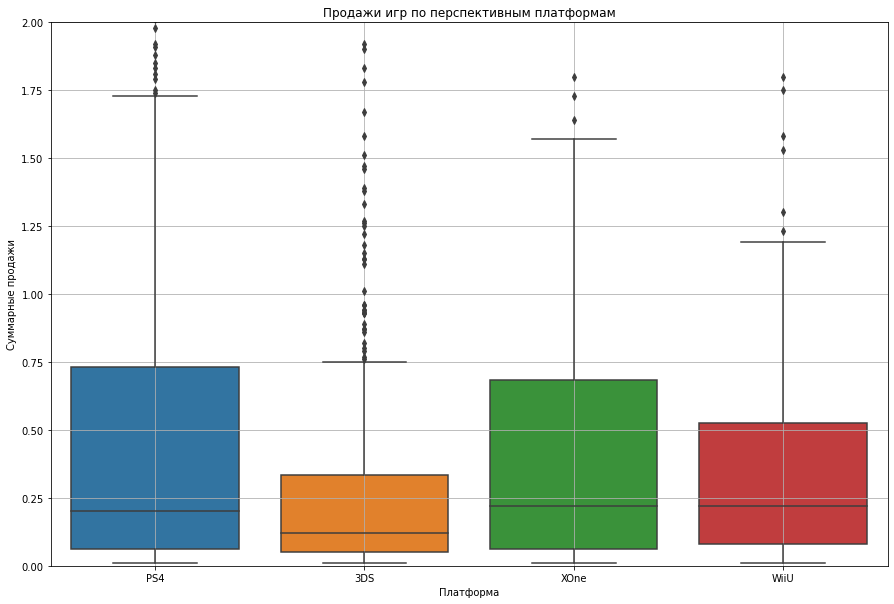

In [29]:
fig = plt.subplots(figsize=(15,10))
plt.title('Продажи игр по перспективным платформам')
plot = sns.boxplot(x='platform', y='total_sales', data=games.query('platform.isin(@top_pl)'))
plt.ylim(0, 2)
plt.xlabel('Платформа')
plt.ylabel('Суммарные продажи')
plt.grid()
plt.show()

In [30]:
print(color.BOLD + '\nСводная статистика о суммарных продажах по платформам' + color.END)
display(games.query('platform.isin(@top_pl)')
        .pivot_table(index='platform', values='total_sales', aggfunc=['sum', 'mean', 'median', 'count'])
        .sort_values(('sum', 'total_sales'), ascending=False))
    


Сводная статистика о суммарных продажах по платформам


,sum,mean,median,count
,total_sales,total_sales,total_sales,total_sales
platform,,,,
PS4,314.14,0.801378,0.20,392
3DS,257.81,0.503535,0.12,512
XOne,159.32,0.645020,0.22,247
WiiU,82.19,0.559116,0.22,147


Сразу обращает на себя внимание размах продаж у PS4, медиана чуть ниже, чем у XOne и WiiU, однако сам ящик и усы имеют больший размах, возможно, это связано с большим количествои игр на платформе.
Совсем немного отстает платформа XOne, тоже имеет довольно большой размах усов и высокое медианное значение продаж.
WiiU и 3DS отстает от вышеописанных конкурентов, однако нужно учесть, что это новые опколения платформ Wii и DS, которые так же показывали высокие продаж в свой пик цикла.  

Медианные продажи по каждой из платформ меньше 0,5 млн, но выбросы показывают, что у каждой из платформ есть бестселлеры, приносящие миллионы - доля таких успешных проектов выше всего у PlayStation 4 и XBox one - это видно и по большему среднему значению числа продаж.    
Выбросы на боксплотах - это какие-то популярные игры. Сравним 3DS и XOne. У первого маленький ящик и много выбросов. Это говорит о том, что большая часть объема продаж делается за счет этих выбросов. В то же время у XOne ситуация иная: большой бокс, длинный ус и мало выбросов. Это свидетельствует о том, что на XOne покупают самые разные игры, причем, в немалом количестве.

### Связь продаж игр и оценок

Сначала посмотрим есть ли связь между оценка пользователей/критиков и продажами наших перспективных игр.  

1. Построим диаграммы рассеяния  
2. Посмотрим корреляцию

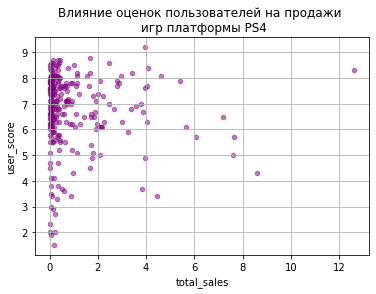

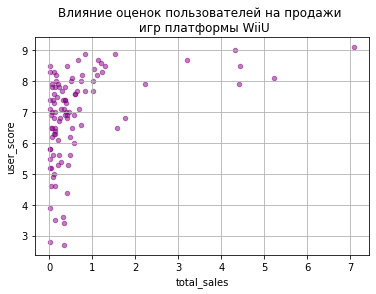

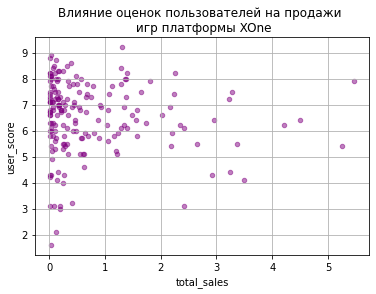

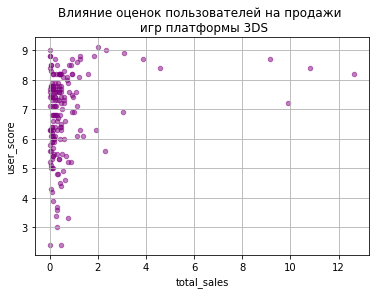

In [31]:
for t in top_pl:
    games.loc[games['platform'] == t].plot(
        kind='scatter', 
        x='total_sales', y='user_score', 
        grid=True, alpha=0.5,
        #xlim=(0,5),
        title=f'Влияние оценок пользователей на продажи \n игр платформы {t}',
        color='purple',
    )
plt.show()

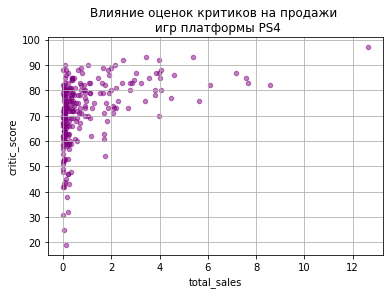

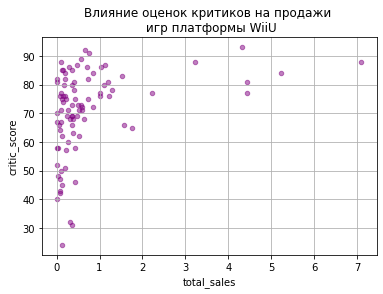

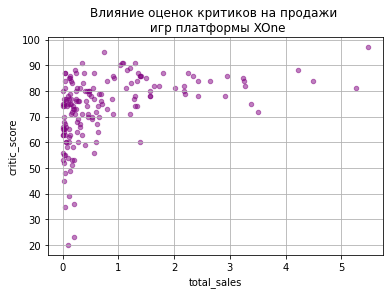

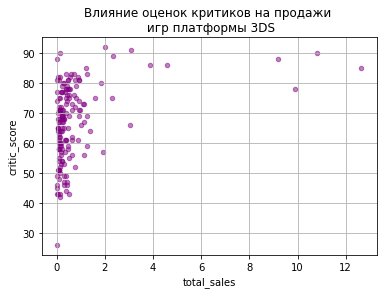

In [32]:
for t in top_pl:
    games.loc[games['platform'] == t].plot(
        kind='scatter', 
        x='total_sales', y='critic_score', 
        grid=True, alpha=0.5,
        #xlim=(0,5),
        title=f'Влияние оценок критиков на продажи \n игр платформы {t}',
        color='purple',
    )
plt.show()

Посмотрим корреляцию для каждой из наших перспективных игр

In [33]:
for t in top_pl:
    print(f'Корреляция между оценками пользователей и критиков для {t}')
    display(games.loc[games['platform'] == t][['critic_score', 'user_score', 'total_sales']].corr())

Корреляция между оценками пользователей и критиков для PS4


,critic_score,user_score,total_sales
critic_score,1.000000,0.557654,0.406568
user_score,0.557654,1.000000,-0.031957
total_sales,0.406568,-0.031957,1.000000


Корреляция между оценками пользователей и критиков для WiiU


,critic_score,user_score,total_sales
critic_score,1.00000,0.770080,0.348380
user_score,0.77008,1.000000,0.400219
total_sales,0.34838,0.400219,1.000000


Корреляция между оценками пользователей и критиков для XOne


,critic_score,user_score,total_sales
critic_score,1.000000,0.472462,0.416998
user_score,0.472462,1.000000,-0.068925
total_sales,0.416998,-0.068925,1.000000


Корреляция между оценками пользователей и критиков для 3DS


,critic_score,user_score,total_sales
critic_score,1.000000,0.745222,0.348740
user_score,0.745222,1.000000,0.222078
total_sales,0.348740,0.222078,1.000000


И на график и на коэффициенте корреляции можно заметить следующее:  
    1. Корреляция между оценкой критиков и продажами весьма слабая (0,34-0,42), такие значения нельзя считать прямой зависимостью. На графиках так же не видно выраженной диагональной линии, которая бы свидетельствовала о наличии связи.     2. С оценками пользователей ситуация еще менее однозначная. В случае PS4 и XOne значение коэффициента Пирсона и вовсе отрицательное. Хотя, конечно, сотые доли процента так же не тянут на наличие зависимости. WiiU, 3DS имеют положительны коэффициенты, однако тоже недостаточные (0,4, 0,22).   
    3. На графиках видно, что оценки китиков имеют меньший "разбег", чем оценки пользователей, это же видно и на коэффициенте корреляции между оценками, - он так же прилично меньше единицы(PS4 и XOne), т. е. высокие оценки пользователей не гарантируют такую же оценку от критиков и наоборот. По WiiU и 3DS зависимость между оценками критиками и пользователями значительно выше (~0,75) здесь оценщики более солидарны друг с другом.     
    4. В случае с WiiU и 3DS на графиках видно, что игры, имеющие максимальное количество продаж получили и высокие оценки, как от пользоваталей, так и от критиков. По PS4 и XOne картинка и тут неоднозначная,- если бестселлеры были высоко оценены критиками, то пользователи не столь категоричны. Например, есть игры, которые были проданы более 5млн экз., при этом получили от пользователей оценки всего лишь 5-6. 

Теперь посмотрим на связь и корреляцию по всем играм за актуальный период и сравним с выводами по перспективным. 

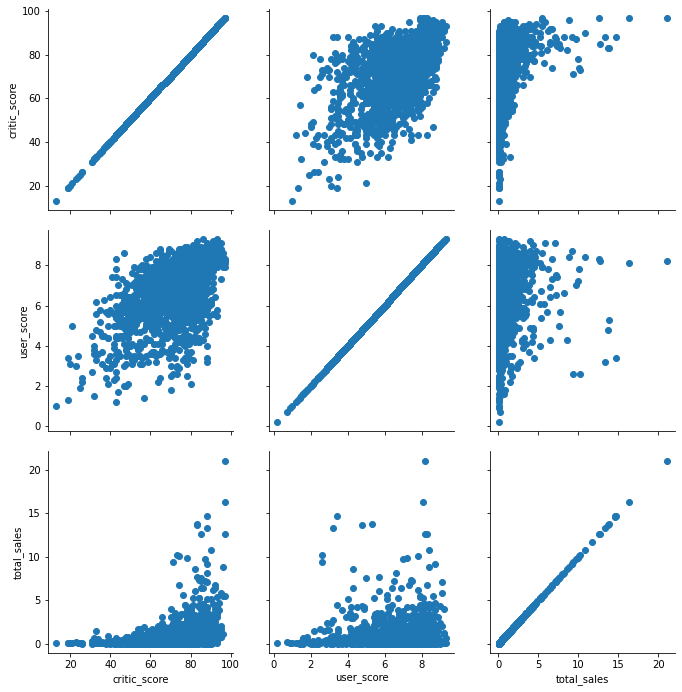

In [34]:
Scaterplots = sns.PairGrid(games[['critic_score', 'user_score', 'total_sales']])
Scaterplots.map(plt.scatter)
Scaterplots.fig.set_size_inches(10,10)
plt.show()

In [35]:
games[['critic_score', 'user_score', 'total_sales']].corr()

,critic_score,user_score,total_sales
critic_score,1.000000,0.535501,0.330319
user_score,0.535501,1.000000,0.031463
total_sales,0.330319,0.031463,1.000000


Картинка по всем играм за актуальный период, в целом, та же.  
Зависимость продаж от оценок критиков есть, но весьма слабая(0,33),а от оценок пользователей е] нет совсем(0,03).

### Распределение игр по жанрам

Посмотрим на распределние по жанрам между нашими перспективными платформами и в целом за актуальный период

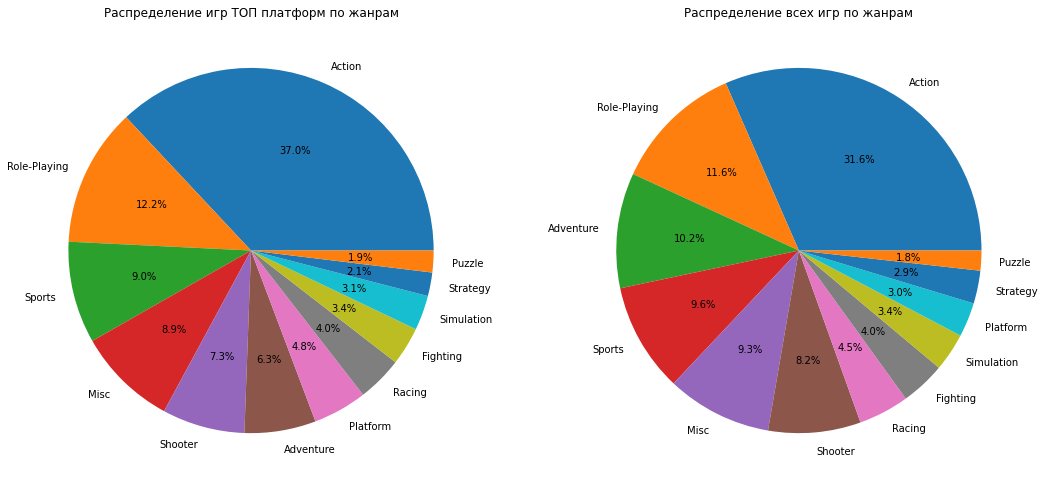

In [36]:
fig, axes= plt.subplots(1,2)

games.query('platform.isin(@top_pl)')['genre'].value_counts().plot(kind='pie', 
                                           y='genre', 
                                           figsize=(18,18), 
                                           autopct='%1.1f%%', 
                                           ylabel=' ',
                                           ax=axes[0],
                                           title = 'Распределение игр ТОП платформ по жанрам'
)
games['genre'].value_counts().plot(kind='pie', 
                                           y='genre', 
                                           figsize=(18,18), 
                                           autopct='%1.1f%%', 
                                           ylabel=' ',
                                           ax=axes[1],
                                           title = 'Распределение всех игр по жанрам'
)

plt.show()

Самый распространенный жанр и по ТОП платформам и в целом - Экшен,  
на втором месте - RPG,  
а вот третье место поделилось по-разному.  
У ТОП платформ это жанр Спорт, а в целом,- Приключения. 
Наименьшее количество игр в жанрах Пазлы и Стратегия.  

Теперь посмотрим продажи по жанрам. 

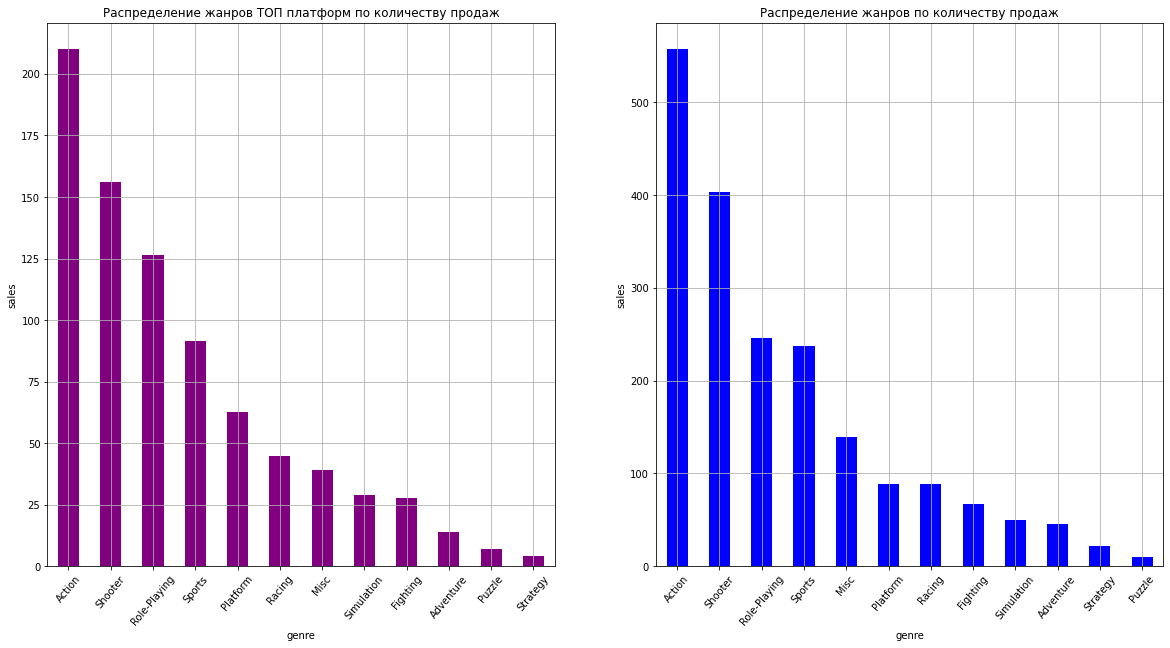

In [37]:
fig, axes= plt.subplots(1,2, figsize=(20,10))

games.query('platform.isin(@top_pl)').groupby('genre').agg({'total_sales':'sum'}).reset_index().sort_values(by='total_sales',ascending=False).plot(
                                    kind='bar',
                                    x='genre',
                                    y='total_sales',
                                    rot=50,
                                    ax=axes[0],
                                    grid=True,
                                    color='purple',
                                    ylabel='sales',
                                    legend=False,
                                    title='Распределение жанров ТОП платформ по количеству продаж'
                                    )

games.groupby('genre').agg({'total_sales':'sum'}).reset_index().sort_values(by='total_sales',ascending=False).plot(
                                    kind='bar',
                                    x='genre',
                                    y='total_sales',
                                    rot=50,
                                    ax=axes[1],
                                    grid=True,
                                    color='blue',
                                    ylabel='sales',
                                    legend=False,
                                    title='Распределение жанров по количеству продаж'
                                    )


plt.show()

Ожидаемо, больше всего продаж игр в жанре Экшен. 
Однако на втором месте неожиданно жанр Шутер, хотя по кол-ву игр он даже не в середине.  

Ну и может быть не совсем корректно сравнивать суммы продаж, как раз из-за разного количества игр, посмотрим медианные значения продаж. 

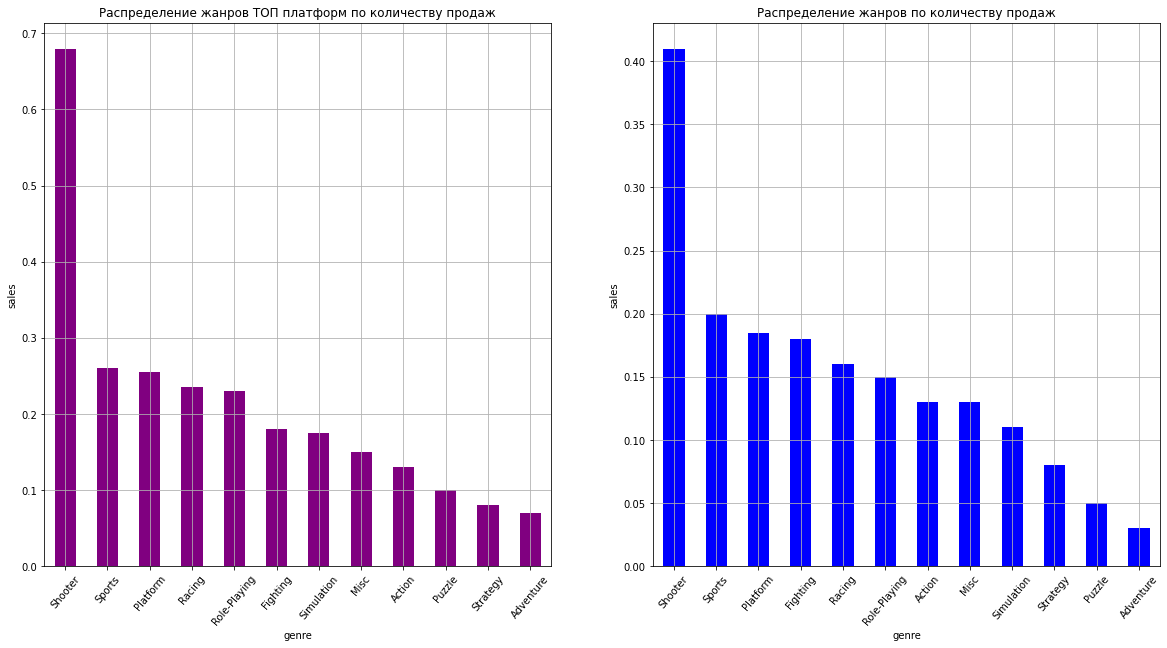

In [38]:
fig, axes= plt.subplots(1,2, figsize=(20,10))

games.query('platform.isin(@top_pl)').groupby('genre').agg({'total_sales':'median'}).reset_index().sort_values(by='total_sales',ascending=False).plot(
                                    kind='bar',
                                    x='genre',
                                    y='total_sales',
                                    rot=50,
                                    ax=axes[0],
                                    grid=True,
                                    color='purple',
                                    ylabel='sales',
                                    legend=False,
                                    title='Распределение жанров ТОП платформ по количеству продаж'
                                    )

games.groupby('genre').agg({'total_sales':'median'}).reset_index().sort_values(by='total_sales',ascending=False).plot(
                                    kind='bar',
                                    x='genre',
                                    y='total_sales',
                                    rot=50,
                                    ax=axes[1],
                                    grid=True,
                                    color='blue',
                                    ylabel='sales',
                                    legend=False,
                                    title='Распределение жанров по количеству продаж'
                                    )


plt.show()

Получается, игры в жанре Экшен имеют самое большое количество проданных экземпляров за счет большего же количества самих игр и/или естселлеров.   
А вот на медианном значении видно, что с большим перевесом по продажам лидируют Шутеры.  
Самыми не прибыльными оказываются Приключенческие игры, хотя их доля (по всем платформам) достатчно весома и составляет 10%. 

**Вывод**  

Мы провели исследовательский анализ и можем сделать следующие промежуточные выводы:  
1. Развитие видеоигр начинается с 1994г. 
2. ТОП платформ по продажам за период 1994-2016 это PS2, X360, PS3, Wii, DS, PS, PS4, GBA  
3. Определили,что цикл жизни плаформ в составляет 9-12 лет.  
4. Определили актуальный период для дальнейшего исследования с 2011г
5. Выявили платформы, имеющие хорошие перспективы по продажам на 2017г: PS4, WiiU, XOne, 3DS  
6. Обнаружили, что зависимость продаж от оценок критиков есть, но она слабая (коэффициент корреляции около 0,3)  
7. Зависимость продаж от оценок пользователей отсутствует совсем  
8. Самое большое количество игр представлено в жанре Экшен  
9. Самые большие суммарные продажи, соответственно, в этом же жанре, однако  
10. исходя из медианных значений, по продажам лидирует жанр Шутер, это значит, что потенциально это самый прибыльный жанр. 

## Шаг 4. Составим портрет пользователя, в зависимости от региона

### Популярные платформы по регионам

Выделим ТОП-5 поопулярных платформ по продажам в зависимости от регионов

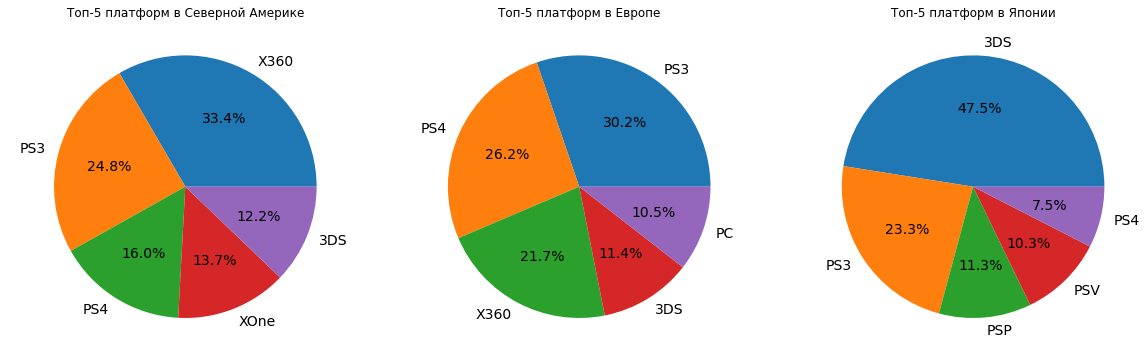

In [39]:
fig, axes= plt.subplots(1,3, figsize=(20,15))

games.groupby('platform').agg({'na_sales': 'sum'}).reset_index().set_index('platform').sort_values(by='na_sales', ascending=False).head().plot(
    kind='pie',
    y='na_sales',
    autopct='%1.1f%%',
    ylabel=' ',
    ax=axes[0],
    textprops={'fontsize': 14},
    legend=False,
    title='Топ-5 платформ в Северной Америке'
)

games.groupby('platform').agg({'eu_sales': 'sum'}).reset_index().set_index('platform').sort_values(by='eu_sales', ascending=False).head().plot(
    kind='pie',
    y='eu_sales',
    autopct='%1.1f%%',
    ylabel=' ',
    ax=axes[1],
    textprops={'fontsize': 14},
    legend=False,
    title='Топ-5 платформ в Европе'
)

games.groupby('platform').agg({'jp_sales': 'sum'}).reset_index().set_index('platform').sort_values(by='jp_sales', ascending=False).head().plot(
    kind='pie',
    y='jp_sales',
    autopct='%1.1f%%',
    ylabel=' ',
    ax=axes[2],
    textprops={'fontsize': 14},
    legend=False,
    title='Топ-5 платформ в Японии'
)

plt.show()

1. В Америке топы по продажам платформы X360 и PS3. XOne и PS4 идут следом, что логично, они сменяют своих предшественников. 3DS представлены в меньшей степени. Превалирование Xbox легко объяснить тем, что его производитель Microsoft располагается в Америке, поэтому японские консоли не так популярны здесь.
2. В Европе Xbox по-прежнему остается в пятерке лидеров, однако более 50% представлены платформами PS двух поколений. То есть в европейской части предпочитают устройства от Sony, но и Xbox пользуется большой популярностью. Своих компаний, производящих консоли, в Европе нет.
3. А вот в Японии заметно сменилась пятерка лидеров, Xbox здесь вообщне не наблюдается, а вот что ожидаемо, почти 50% занимает платформа от Nintendo - 3DS. Более 50% от всех пяти лидеров занимают различные платформы PS, даже PSV, которую в других странах и в общей таблице в лидерах мы не наблюдали. Что и стоило ожидать - Основной лидер в Японии(47%) представлен Японскими производителями.

### Популярные жанры по регионам

Выделим ТОП-5 поопулярных жанров по продажам в зависимости от регионов

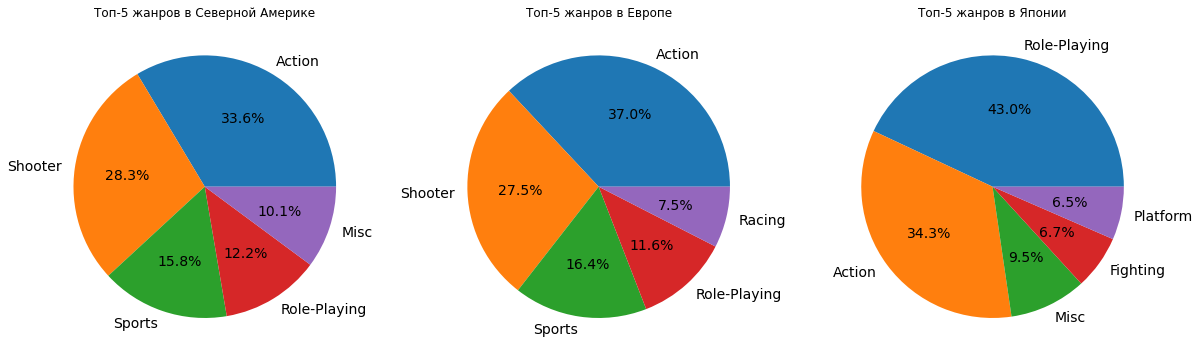

In [40]:
fig, axes= plt.subplots(1,3, figsize=(20,15))

games.groupby('genre').agg({'na_sales': 'sum'}).reset_index().set_index('genre').sort_values(by='na_sales', ascending=False).head().plot(
    kind='pie',
    y='na_sales',
    autopct='%1.1f%%',
    ylabel=' ',
    ax=axes[0],
    textprops={'fontsize': 14},
    legend=False,
    title='Топ-5 жанров в Северной Америке'
)

games.groupby('genre').agg({'eu_sales': 'sum'}).reset_index().set_index('genre').sort_values(by='eu_sales', ascending=False).head().plot(
    kind='pie',
    y='eu_sales',
    autopct='%1.1f%%',
    ylabel=' ',
    ax=axes[1],
    textprops={'fontsize': 14},
    legend=False,
    title='Топ-5 жанров в Европе'
)

games.groupby('genre').agg({'jp_sales': 'sum'}).reset_index().set_index('genre').sort_values(by='jp_sales', ascending=False).head().plot(
    kind='pie',
    y='jp_sales',
    autopct='%1.1f%%',
    ylabel=' ',
    ax=axes[2],
    textprops={'fontsize': 14},
    legend=False,
    title='Топ-5 жанров в Японии'
)

plt.show()

1. В Америке основную долю ззанимают игры жанра Экшен, на втором месте - Шутер. В меньшей степени американскому рынку интересны Спортивные и РПГ игры. А Misc замыкают пятерку лидеров.  
2. В Европе картинка схожая с Американским рынком: лидируют Экшены и Шутеры. Только вот замыкают пятерку лидеров здесь гонки. Сложно сказать, с чем связано такое распределение. Может быть, играет роль некоторая схожесть игровых платформ, может быть, связано с похожими производителями для американского и европейского рынка.  
3. В Японии весомо отличается распределение по жанрам. РПГ здесь занимают лидирующие позиции, Экшен на втором месте с достаточной объемной долей, а вот Шутеры вообще не вошли в ТОП5. Замыкают рейтинг жанр Platform. 

### Влияние рейтинга на ппродажи по регионам

Сначала посмотрим какие у нас вообще осались категории после актуализации периода. 

In [41]:
games['rating'].unique()

array(['M', 'unknown', 'E', 'E10+', 'T', 'EC'], dtype=object)

- E - подходит для лиц всех возрастов, в том числе и детей
- М - для лиц старше 17 лет
- T - для лиц старше 13 лет
- E10+ - для лиц старше 10 лет
- EC - для дете от 3х лет

Посмотрим, как влияет рейтинг ESRB на продажи игр в различных регионах.

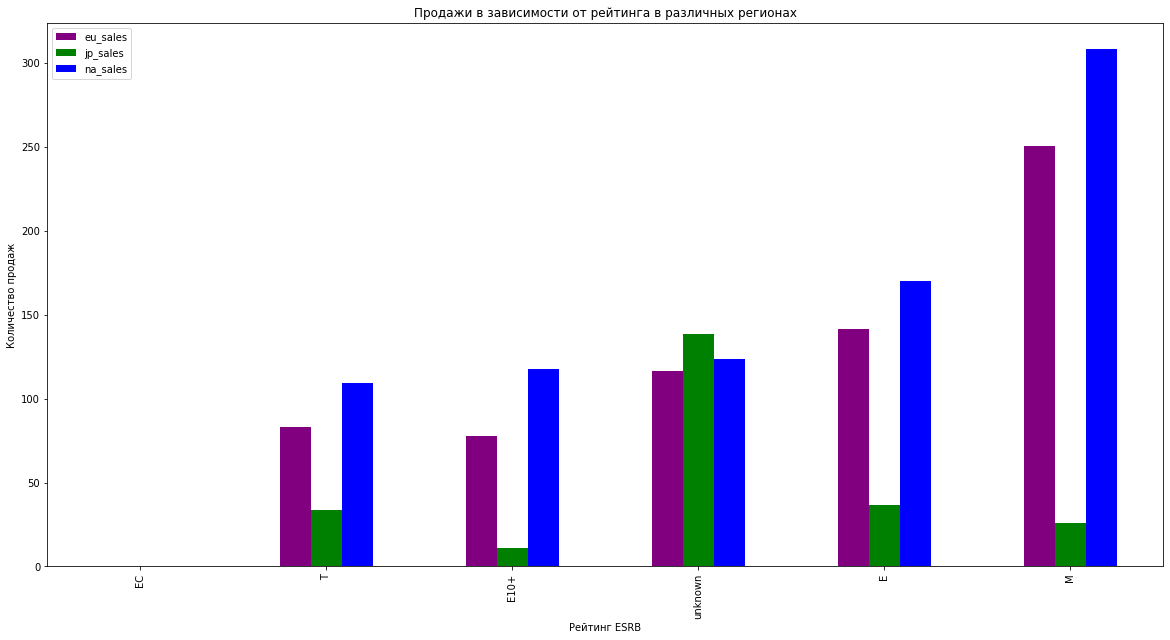

In [42]:
 (
    games.pivot_table(index='rating', values=['na_sales', 'eu_sales', 'jp_sales'], aggfunc='sum')
    .sort_values(by='na_sales')
    .plot(kind='bar', figsize=(20, 10), color=('purple', 'green', 'blue'))
)
plt.xlabel('Рейтинг ESRB')
plt.ylabel('Количество продаж')
plt.title('Продажи в зависимости от рейтинга в различных регионах')
plt.show()

 Топ самых продаваемых категорий в Америке и Европе совпадает. Больше всего продаются игры с рейтингом "для лиц старше 17 лет". Следом идут игры для всех - игры, которые имеют самую широкую аудиторию, могут быть интересны как детям, так и взрослым, затем игры без ретинга. Рейтинг ESRB предназначен для рецензирования игр на территории Северной Америки (США, Канады, Мексики), всё же и в америке и в Европе давольно популярны игры платформы 3DS.  
И поэтому в Японии так популярны игры вовсе без этого рейтинга - судя по всему, это игры, созданные в Японии и не получавшие рейтинга, но популярные на своей родине.

**Вывод**  

Региональные особенности определенно имеют влияние и на популярность платформ и жанров, так же, есть отличия по продажам в зависимости от рейтинга:  

    1. В Америке топы по продажам платформы X360 и PS3, В Европе Xbox по-прежнему остается в пятерке лидеров, однако более 50% представлены платформами PS двух поколений, А вот в Японии Xbox вообщне не наблюдается в ТОП5, а вот что ожидаемо, почти 50% занимает платформа от Nintendo - 3DS и чуть более 50% игры платформы PS разных поколений.  
    2. В Америке и Европе основную долю ззанимают игры жанра Экшен, на втором месте - Шутер, в Японии лидер РПГ, на втором - Экшен, а вот Шутеры даже не попали в ТОП5. 
    3. Рейтинг. Топ самых продаваемых категорий в Америке и Европе совпадает. Больше всего продаются игры с рейтингом "для лиц старше 17 лет". В Японии так популярны игры вовсе без рейтинга, т. к. ESRB создан для рецензирования игр на территории Северной Америки - судя по всему, это игры, созданные в Японии и не получавшие рейтинга, но популярные на своей родине.

## Шаг 5. Проверка гипотез

### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

Для этого мы воспользуемся т-тестом двух независимых выборок.  

Нулевая гипотеза H0 будет звучать так: "Средние пользовательские рейтинги платформ Xbox One и PC одинаковые",
Н1: "Средние пользовательские рейтинги платформ Xbox One и PC не одинаковые".  

Для проверки, найдем р-значение - верояность случайно получить наблюдаемое или любое другое значение, при условии верности нулевой гипотезы.  
Порог уровня статистической значимости примем за 5%.  
Тест будет двусторонний. 

In [43]:
alpha = 0.05  # критический уровень статистической значимости
results = st.ttest_ind(
    games[(games.platform == "XOne") & (games.user_score.notna())]['user_score'], # уберем пропуски из расчета
    games[(games.platform == "PC") & (games.user_score.notna())]['user_score']
)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 
    
print('Средняя оценка пользователей игр платформы XOne', (games[(games.platform == "XOne") & (games.user_score.notna())]['user_score']).mean())
print('Средняя оценка пользователей игр платформы PC', (games[(games.platform == "PC") & (games.user_score.notna())]['user_score']).mean())

p-значение: 0.6267602271422398
Не получилось отвергнуть нулевую гипотезу
Средняя оценка пользователей игр платформы XOne 6.521428571428572
Средняя оценка пользователей игр платформы PC 6.451791530944625


Р-значение по результатам ттеста выше пороговой значимости, а значит, мы не может отвергнуть нулевую гипотезу равенстве средних оценок по этим платформам.  
Можем посмотреть на графике распределение оценок. 

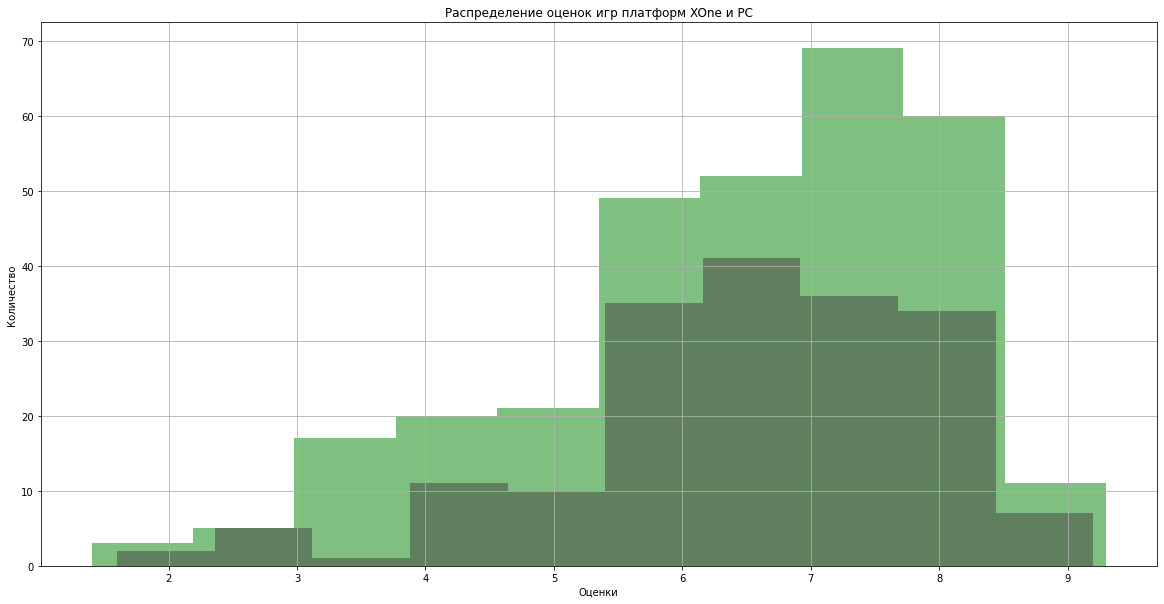

In [44]:
 fig, ax = plt.subplots(figsize=(20, 10))
ax.hist(games[(games.platform == "XOne") & (games.user_score.notna())]['user_score'],
        bins=10, color='purple', alpha=0.5)
ax.hist(games[(games.platform == "PC") & (games.user_score.notna())]['user_score'],
        bins=10, color='green', alpha=0.5)
plt.grid()
plt.xlabel('Оценки')
plt.ylabel('Количество')
plt.title('Распределение оценок игр платформ XOne и PC')
plt.show()

Распределение пользовательских оценок очень близки.  
Гипотезу о равенстве средних оценок отвергнуть так же не удалось, однако XOne остается популярной и востребованной платформой, а вот ПК к 2016 году имеет низкие продажи и не рассматривается как потенциально прибыльная платформа.  


### Средние пользовательские рейтинги жанров Action и Sports разные

Для этого мы воспользуемся т-тестом двух независимых выборок.  

Нулевая гипотеза H0 будет звучать так: "Средние пользовательские рейтинги жанров Action и Sports одинаковые",
Н1: "Средние пользовательские рейтинги жанров Action и Sports не одинаковые".  

Для проверки, найдем р-значение - верояность случайно получить наблюдаемое или любое другое значение, при условии верности нулевой гипотезы.  
Порог уровня статистической значимости примем за 5%.  
Тест будет двусторонний. 

In [45]:
alpha = 0.05  # критический уровень статистической значимости
results = st.ttest_ind(
    games[(games.genre == "Action") & (games.user_score.notna())]['user_score'], # уберем пропуски из расчета
    games[(games.genre == "Sports") & (games.user_score.notna())]['user_score']
)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 
    
print('Средняя оценка пользователей игр жанрa Action', (games[(games.genre == "Action") & (games.user_score.notna())]['user_score']).mean())
print('Средняя оценка пользователей игр жанрa Sports', (games[(games.genre == "Sports") & (games.user_score.notna())]['user_score']).mean())

p-значение: 6.700647490667088e-24
Отвергаем нулевую гипотезу
Средняя оценка пользователей игр жанрa Action 6.775903614457831
Средняя оценка пользователей игр жанрa Sports 5.651428571428571


Р-значение по результатам ттеста стремится к 0, значит, мы должны отвергнуть теорию о равенстве средних оценок в жанрах Action и Sports в пользу их разности.  
Мы так же можем видеть, что срдние оценки игр в жанре Action на 1,1пункт выше, чем в жанре Sports.  

Посмотрим на распределение оценок. 

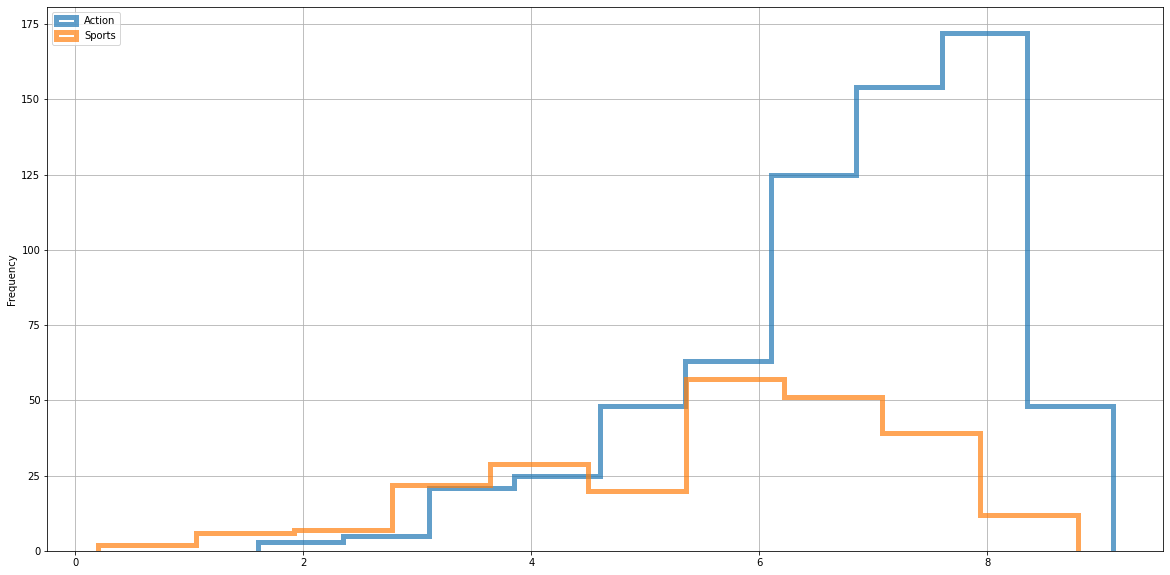

In [46]:
games[(games.genre == "Action") & (games.user_score.notna())]['user_score'].plot(
    kind='hist',
    histtype='step',
    alpha=0.7,
    linewidth=5,
    grid=True,
    label='Action',
    legend=True,
    figsize=(20,10)
)

games[(games.genre == "Sports") & (games.user_score.notna())]['user_score'].plot(
    kind='hist',
    histtype='step',
    alpha=0.7,
    linewidth=5,
    grid=True,
    label='Sports',
    legend=True,
    figsize=(20,10)
)

plt.show()

Распределение оценок Спортивных игр более широкое и плоское, относительно игр Экшен.  

**Вывод**  

1. Гипотезу о равенстве средних пользовательских оценок игр платформ Xbox One и PC опровергнуть не удалось. 
2. Изначальное предположение о том, что "Средние пользовательские рейтинги жанров Action и Sports разные" имеет место быть, т. к. гипотезу о их равенсте ттест отверг.

## Шаг 6. Общий вывод

Итак, мы провели анализ продаж компьютерных игр.  
Приведем короткое резюме и. сделаем окончатльный вывод, отвечающий на главный вопрос исследования *выявить определяющие успешность игры закономерности на 2017г*  

1. Выгрузили данные и обработали их:  

* Заменили названия колонок на стилистически правильные  
* Удалили пропуски в столбцах с Именем, Жанром и Годом релиза, т. к. доля пропусков была меньше 2%  
* Обработали дубликаты по связке Имя, Платформа, Год релиза  
* В столбце Год релиза заменили тип данных на целочисленный, а в Оценка пользователей на Число с плавающей запятой  
* Так же в Оценках пользователей убрали "Будет оценен" на пропуск  
* В столбце с Рейтингом убрали неактуальные значения и заполнили пропуски 'unknown'  
* Добавили столбец с суммарными продажами по всем регионам для каждой игры.  

2. Провели исслдовательский анализ:  

* Развитие видеоигр начинается с 1994г. 
* ТОП платформ по продажам за период 1994-2016 это PS2, X360, PS3, Wii, DS, PS, PS4, GBA  
* Определили,что цикл жизни плаформ в составляет 9-12 лет.  
* Определили актуальный период для дальнейшего исследования с 2011г
* Выявили платформы, имеющие хорошие перспективы по продажам **на 2017г: PS4, WiiU, XOne, 3DS** 
* Обнаружили, что зависимость продаж от оценок критиков есть, но она слабая (коэффициент корреляции около 0,3)  
* Зависимость продаж от оценок пользователей отсутствует совсем  
* Самое большое количество игр представлено в жанре Экшен  
* Самые большие суммарные продажи, соответственно, в этом же жанре, однако  
* исходя из медианных значений, по продажам лидирует жанр Шутер, это значит, что потенциально это самый прибыльный жанр.  

3. Составили портреты пользователей в ависимости от региона:  

* В Америке топы по продажам платформы X360 и PS3, В Европе Xbox по-прежнему остается в пятерке лидеров, однако более 50% представлены платформами PS двух поколений, А вот в Японии Xbox вообщне не наблюдается в ТОП5, а вот что ожидаемо, почти 50% занимает платформа от Nintendo - 3DS и чуть более 50% игры платформы PS разных поколений.  
* В Америке и Европе основную долю ззанимают игры жанра Экшен, на втором месте - Шутер, в Японии лидер РПГ, на втором - Экшен, а вот Шутеры даже не попали в ТОП5. 
* Рейтинг. Топ самых продаваемых категорий в Америке и Европе совпадает. Больше всего продаются игры с рейтингом "для лиц старше 17 лет". В Японии так популярны игры вовсе без рейтинга, т. к. ESRB создан для рецензирования игр на территории Северной Америки - судя по всему, это игры, созданные в Японии и не получавшие рейтинга, но популярные на своей родине.  

4. Провери две гипотезы:  

* Гипотезу о равенстве средних пользовательских оценок игр платформ Xbox One и PC опровергнуть не удалось. 
* Изначальное предположение о том, что "Средние пользовательские рейтинги жанров Action и Sports разные" имеет место быть, т. к. гипотезу о их равенсте ттест отверг.  

_**Определяющие успешность игры закономерности**_  

1. Платформа, выпускающая игру, в т. ч. стоит учесть регион продаж. 
2. Жанр игры, аналогично нужно учитывать регион продаж. 
3. Оценки критиков, хоть и не большое, но влияние имюет (оценки пользователей не влияют). 
4. Рейтинг Игры имеет значение при распространении в Америке и Европе